In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('data/2022/heart_2022_with_nans.csv')
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


### Values for Each Feature

In [20]:
for col_name in df.columns:
    print(col_name)
    print(np.unique(df[col_name][~pd.isna(df[col_name])]))
    print()

State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virgin Islands' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin'
 'Wyoming']

Sex
['Female' 'Male']

GeneralHealth
['Excellent' 'Fair' 'Good' 'Poor' 'Very good']

PhysicalHealthDays
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]

MentalHealthDays
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24

# Drop Missing/Impute Data

Temporarily drop NA, see if want to impute

In [28]:
df.dropna(inplace=True)

# Response Variable

The response variable HadHeartDisease will combine the HadHeartAttack and HadAngina features where "Yes" indicates the patient had heart disease and "No" indicates the patient did not have heart disease. If either column had "Yes", then HadHeartDisease will also be "Yes", otherwise HadHeartDisease will be "No".

In [29]:
# df['HadHeartDisease'] = df['HadHeartAttack']
# df.drop(columns=['HadHeartAttack'], axis=1, inplace=True)
df['HadHeartDisease'] = df.apply(lambda x: 'Yes' if x['HadHeartAttack'] == 'Yes' or x['HadAngina'] == 'Yes' else 'No', axis=1)
df.drop(columns=['HadHeartAttack', 'HadAngina'], axis=1, inplace=True)

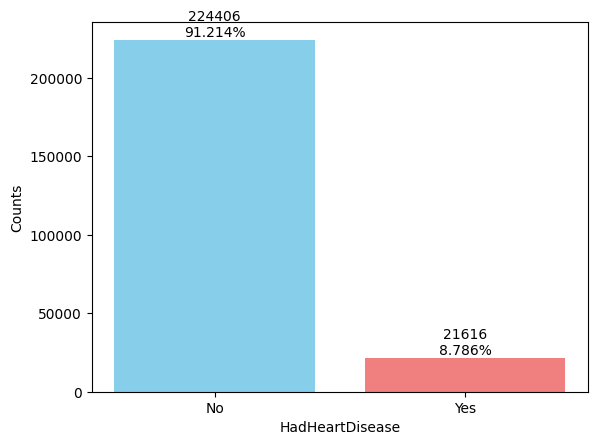

In [30]:
plt.figure()

values, counts = np.unique(df['HadHeartDisease'], return_counts=True)
bars = plt.bar(range(len(counts)), counts, color=['skyblue', 'lightcoral'])
for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}\n{yval/np.sum(counts)*100:.3f}%', 
             ha='center', va='bottom') 

plt.xlabel('HadHeartDisease')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Counts')
plt.show()

# Feature Variables

### Feature selection

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [32]:
df.drop(columns=['State'], inplace=True, axis=1)

In [33]:
ordinal_features = ['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'AgeCategory', 'TetanusLast10Tdap', 'CovidPos']
encoder = OrdinalEncoder(categories=[
    ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    ['Within past year (anytime less than 12 months ago)', 'Within past 2 years (1 year but less than 2 years ago)', 'Within past 5 years (2 years but less than 5 years ago)', '5 or more years ago'],
    ['None of them', '1 to 5', '6 or more, but not all', 'All'],
    ['No', 'No, pre-diabetes or borderline diabetes', 'Yes, but only during pregnancy (female)', 'Yes'],
    ['Never smoked', 'Former smoker', 'Current smoker - now smokes some days', 'Current smoker - now smokes every day'],
    ['Never used e-cigarettes in my entire life', 'Not at all (right now)', 'Use them every day', 'Use them some days'],
    ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older'],
    ['No, did not receive any tetanus shot in the past 10 years', 'Yes, received tetanus shot but not sure what type', 'Yes, received tetanus shot, but not Tdap', 'Yes, received Tdap'],
    ['No', 'Yes', 'Tested positive using home test without a health professional']
])
df[ordinal_features] = encoder.fit_transform(df[ordinal_features])

In [34]:
numeric_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(exclude=['number']).columns 

In [35]:
scaler = StandardScaler()
# df_num = pd.DataFrame(scaler.fit_transform(df[numeric_features]), columns=numeric_features, index=df.index)
df_num = pd.DataFrame(df[numeric_features], columns=numeric_features, index=df.index)

In [36]:
df_cat = pd.get_dummies(df[categorical_features], drop_first=True)

In [37]:
df_combined = pd.concat([df_num, df_cat], axis=1)
df_combined

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,SleepHours,RemovedTeeth,HadDiabetes,SmokerStatus,ECigaretteUsage,AgeCategory,...,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AlcoholDrinkers_Yes,HIVTesting_Yes,FluVaxLast12_Yes,PneumoVaxEver_Yes,HighRiskLastYear_Yes,HadHeartDisease_Yes
342,3.0,4.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,9.0,...,0,0,0,1,0,0,1,1,0,0
343,3.0,0.0,0.0,0.0,6.0,0.0,3.0,1.0,0.0,10.0,...,0,0,0,1,0,0,1,1,0,0
345,3.0,0.0,0.0,0.0,8.0,2.0,0.0,1.0,0.0,11.0,...,0,0,0,1,1,0,0,1,0,0
346,1.0,5.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,12.0,...,0,0,0,1,0,0,1,1,0,0
347,2.0,3.0,15.0,0.0,5.0,1.0,0.0,0.0,0.0,12.0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445117,3.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,8.0,...,0,0,0,1,1,0,0,0,0,0
445123,1.0,0.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
445124,2.0,0.0,15.0,0.0,7.0,1.0,3.0,0.0,0.0,9.0,...,0,1,0,0,1,1,1,1,0,0
445128,4.0,2.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,6.0,...,0,0,0,0,0,1,1,0,0,0


In [38]:
X = df_combined.drop(columns='HadHeartDisease_Yes', axis=1)
y = df_combined['HadHeartDisease_Yes'].values

### mutual information

In [39]:
# mi = mutual_info_classif(X, y, discrete_features='auto')

In [40]:
# # Create a DataFrame to display the results
# mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
# mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# # Reshape for heatmap (using only one row)
# mi_matrix = mi_df.set_index('Feature').T  # Transpose to have features as rows

# plt.figure(figsize=(12, 10))
# plt.bar(range(len(mi_df)), mi_df['Mutual Information'], tick_label=mi_df['Feature'])
# plt.xticks(rotation=90)
# plt.xlabel('Features')
# plt.ylabel('Mutual Information with HadHeartDisease')
# plt.title('Mutual Information Scores for Features (Sorted)')
# plt.tight_layout()
# plt.show()

### correlation matrix

In [41]:
# correlation_matrix = df_combined.corr(method='spearman')

In [42]:
# # labels, var_corr = zip(*dict(correlation_matrix['HadHeartDisease_Yes']).items())
# target_corr = correlation_matrix['HadHeartDisease_Yes'].drop('HadHeartDisease_Yes')  
# target_corr = sorted(zip(target_corr.index, target_corr.values), key=lambda x:-abs(x[1]))
# for name, corr in target_corr:
#     print(f'{name}: {corr}')

# plt.figure(figsize=(12, 12))
# name, corr = zip(*target_corr)
# plt.bar(name, corr)
# plt.xlabel('Features')
# plt.ylabel('Spearman Correlation with HadHeartDisease_Yes')
# plt.xticks(rotation=90)  # Rotate x labels for better readability
# plt.title('Spearman Correlation of Features with HadHeartDisease_Yes')
# plt.tight_layout()  # Adjust layout to prevent clipping of labels
# plt.show()

In [43]:
# # Plotting the correlation matrix heatmap
# plt.figure(figsize=(20, 20))
# sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
# plt.title("Correlation Matrix Heatmap")
# plt.xlabel("Features")
# plt.ylabel("Features")
# plt.show()

In [44]:
# plt.figure()
# sns.pairplot(df_combined, hue='HadHeartDisease', corner=True)
# plt.legend(loc='upper right')
# plt.show()

### lasso regression

In [45]:
from sklearn.linear_model import Lasso

In [46]:
lasso = Lasso(alpha=0.01) 
lasso.fit(X, y)

Lasso(alpha=0.01)

In [47]:
importance = np.abs(lasso.coef_)

In [48]:
features = X.columns
lasso_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
lasso_importance_df

,Feature,Importance
0,GeneralHealth,0.027985
1,PhysicalHealthDays,0.002471
2,MentalHealthDays,0.000077
3,LastCheckupTime,0.000000
4,SleepHours,0.000000
5,RemovedTeeth,0.009659
6,HadDiabetes,0.014603
7,SmokerStatus,0.000000
8,ECigaretteUsage,0.000000
9,AgeCategory,0.013874


In [49]:
selected_features = lasso_importance_df[lasso_importance_df['Importance'] > 0]

In [50]:
print("Selected Features by Lasso Regression:")
print(selected_features)

Selected Features by Lasso Regression:
               Feature  Importance
0        GeneralHealth    0.027985
1   PhysicalHealthDays    0.002471
2     MentalHealthDays    0.000077
5         RemovedTeeth    0.009659
6          HadDiabetes    0.014603
9          AgeCategory    0.013874
11   WeightInKilograms    0.000968
12                 BMI    0.002520
30       ChestScan_Yes    0.025838


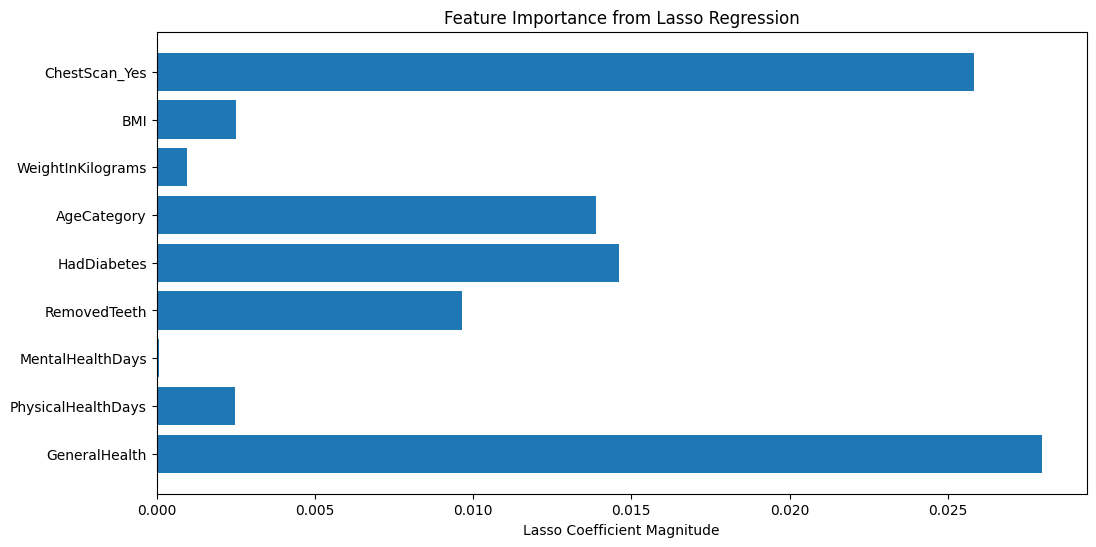

In [51]:
# Optionally plot the importance
plt.figure(figsize=(12, 6))
plt.barh(selected_features['Feature'], selected_features['Importance'])
plt.xlabel('Lasso Coefficient Magnitude')
plt.title('Feature Importance from Lasso Regression')
plt.show()

### columns of interest

In [59]:
cols = [
    'Sex_Male',
    'GeneralHealth',
    'PhysicalHealthDays',
    'MentalHealthDays',
    'LastCheckupTime',
    'SleepHours',
    'HadStroke_Yes',
    'SmokerStatus',
    'ECigaretteUsage',
    'ChestScan_Yes',
    'RaceEthnicityCategory_Hispanic',
    'RaceEthnicityCategory_Multiracial, Non-Hispanic',
    'RaceEthnicityCategory_Other race only, Non-Hispanic',
    'RaceEthnicityCategory_White only, Non-Hispanic',
    'AgeCategory',
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'HighRiskLastYear_Yes',
    # 'HadAngina_Yes'
]

In [60]:
heart_df = df_combined[cols]
heart_df

,Sex_Male,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,SleepHours,HadStroke_Yes,SmokerStatus,ECigaretteUsage,ChestScan_Yes,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AgeCategory,HeightInMeters,WeightInKilograms,BMI,HighRiskLastYear_Yes
342,0,3.0,4.0,0.0,0.0,9.0,0,1.0,0.0,0,0,0,0,1,9.0,1.60,71.67,27.99,0
343,1,3.0,0.0,0.0,0.0,6.0,0,1.0,0.0,0,0,0,0,1,10.0,1.78,95.25,30.13,0
345,1,3.0,0.0,0.0,0.0,8.0,0,1.0,0.0,1,0,0,0,1,11.0,1.85,108.86,31.66,0
346,0,1.0,5.0,0.0,0.0,9.0,0,0.0,0.0,0,0,0,0,1,12.0,1.70,90.72,31.32,0
347,0,2.0,3.0,15.0,0.0,5.0,0,0.0,0.0,0,0,0,0,1,12.0,1.55,79.38,33.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445117,1,3.0,0.0,0.0,1.0,6.0,0,0.0,0.0,0,0,0,0,1,8.0,1.78,102.06,32.28,0
445123,0,1.0,0.0,7.0,0.0,7.0,0,0.0,0.0,0,0,0,0,0,1.0,1.93,90.72,24.34,0
445124,1,2.0,0.0,15.0,0.0,7.0,1,0.0,0.0,0,0,1,0,0,9.0,1.68,83.91,29.86,0
445128,0,4.0,2.0,2.0,0.0,7.0,0,0.0,0.0,0,0,0,0,0,6.0,1.70,83.01,28.66,0


# Preprocessing

In [61]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [62]:
X = heart_df
y = df_combined['HadHeartDisease_Yes'].values

In [192]:
smote = SMOTE(sampling_strategy=0.4, random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [193]:
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled_smote = scaler.fit_transform(X_smote)
X_scaled = scaler.fit_transform(X)

In [194]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_scaled_smote, y_smote, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Classification

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [67]:
# rf = RandomForestClassifier(n_estimators=20, criterion='entropy', max_depth=30, max_leaf_nodes=2, max_features='sqrt', class_weight='balanced')
rf = RandomForestClassifier(criterion='entropy', max_features='sqrt', class_weight='balanced')

imbalanced

In [68]:
train_accuracies = []
test_accuracies = []

# Train the model for different numbers of trees and record accuracies
for n_estimators in range(1, 10):
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)

    # Predict on the training set
    train_pred = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on the testing set
    test_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

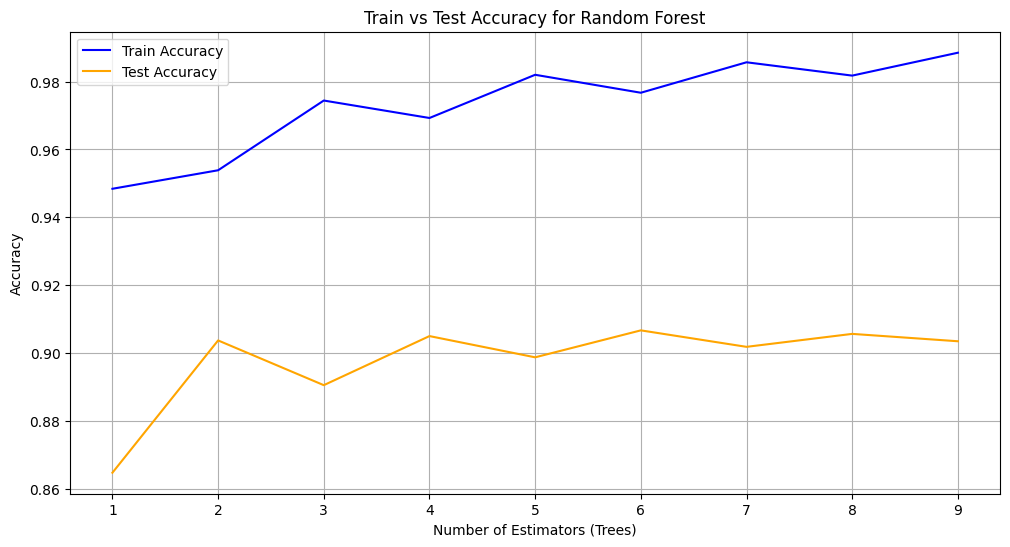

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, 10), test_accuracies, label='Test Accuracy', color='orange')
plt.title('Train vs Test Accuracy for Random Forest')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [70]:
ypred_rf = rf.predict(X_test)

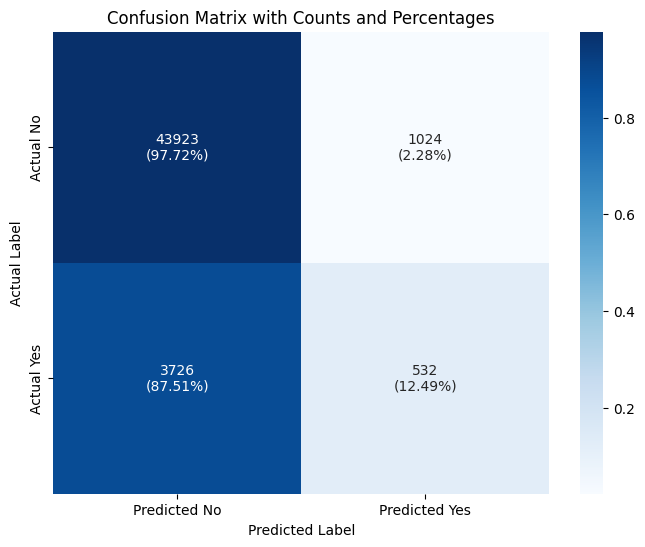

In [71]:
cm = confusion_matrix(y_test, ypred_rf)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

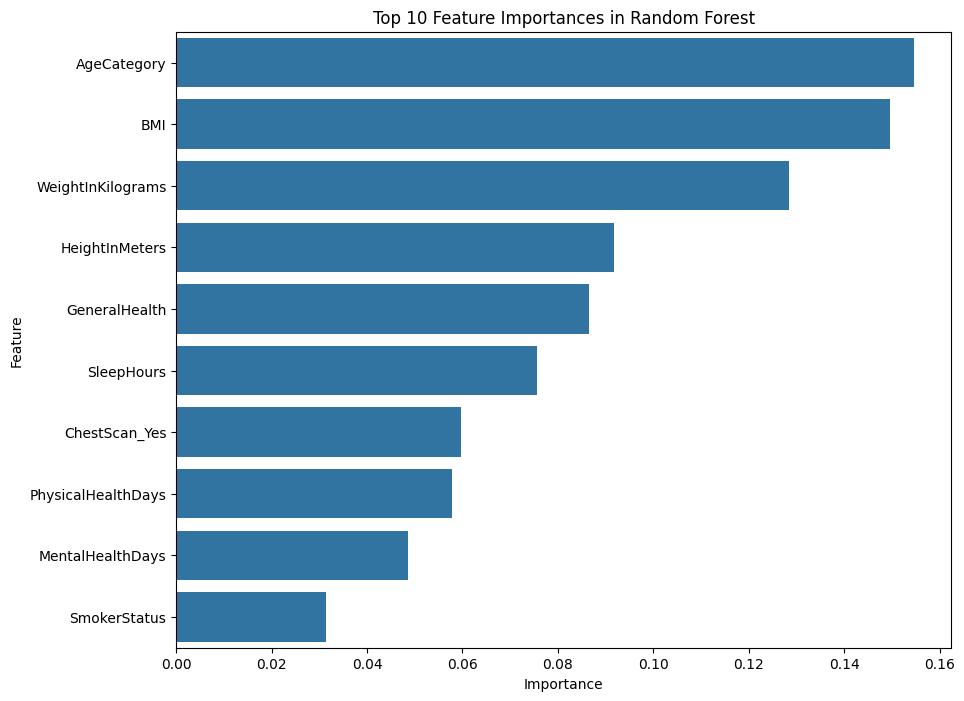

In [72]:
feature_importances = rf.feature_importances_
feature_names = X.columns 

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Adjust head(n) to show top n features
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

balanced (smote)

In [73]:
train_accuracies = []
test_accuracies = []

# Train the model for different numbers of trees and record accuracies
for n_estimators in range(1, 10):
    rf.n_estimators = n_estimators
    rf.fit(X_train_smote, y_train_smote)

    # Predict on the training set
    train_pred = rf.predict(X_train_smote)
    train_accuracy = accuracy_score(y_train_smote, train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on the testing set
    test_pred = rf.predict(X_test_smote)
    test_accuracy = accuracy_score(y_test_smote, test_pred)
    test_accuracies.append(test_accuracy)

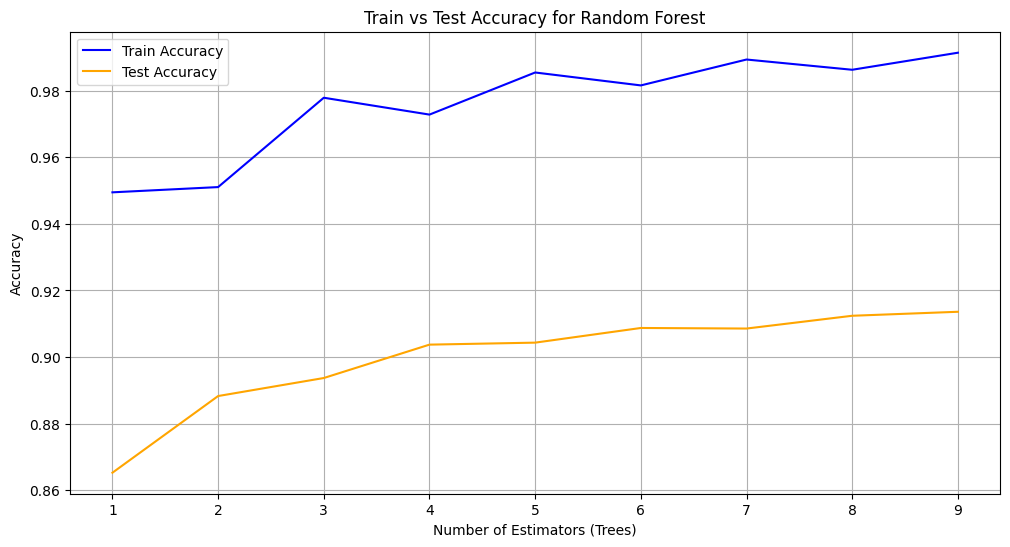

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, 10), test_accuracies, label='Test Accuracy', color='orange')
plt.title('Train vs Test Accuracy for Random Forest')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [75]:
ypred_rf = rf.predict(X_test_smote)

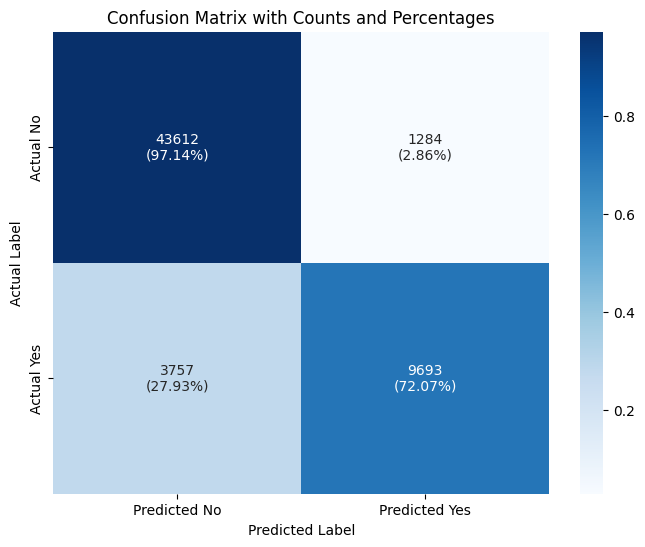

In [76]:
cm = confusion_matrix(y_test_smote, ypred_rf)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [77]:
ypred_rf = rf.predict(X_test)

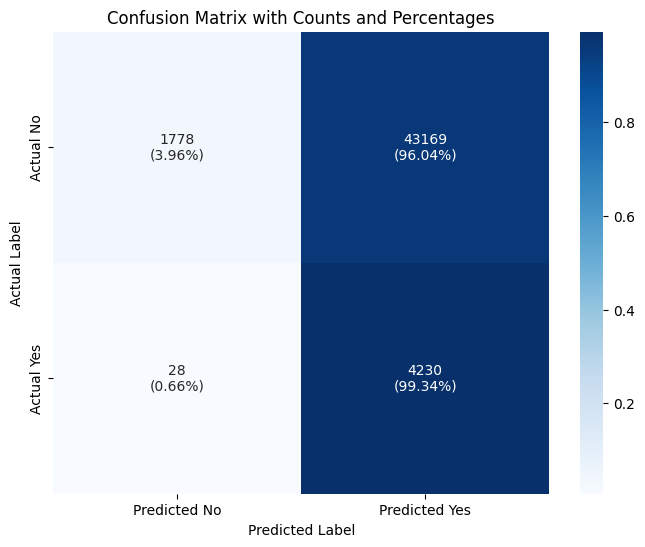

In [78]:
cm = confusion_matrix(y_test, ypred_rf)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

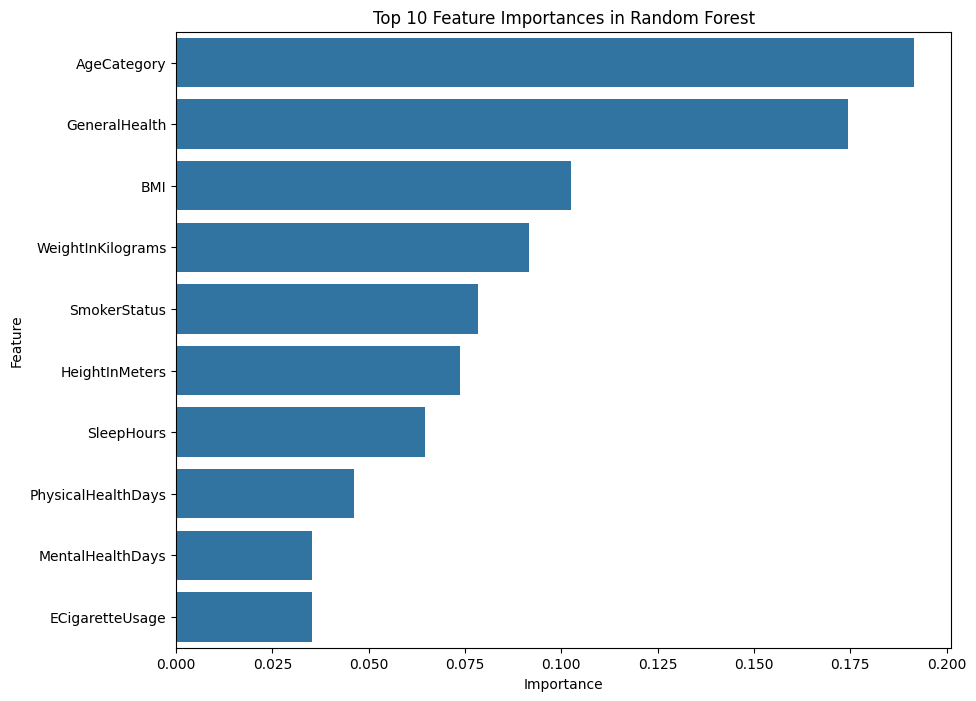

In [79]:
feature_importances = rf.feature_importances_
feature_names = X.columns 

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Adjust head(n) to show top n features
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# One-Class SVM

In [40]:
# from sklearn.svm import OneClassSVM

In [41]:
# svm_model = OneClassSVM(kernel="rbf", gamma=0.001, nu=0.3) 

In [ ]:
# svm_model.fit(X_train)

In [223]:
# y_pred_svm = svm_model.predict(X_test)

In [226]:
# y_pred_binary = np.where(y_pred_svm == -1, 1, 0)

In [ ]:
# cm = confusion_matrix(y_test, y_pred_binary)
# cm

In [ ]:
# cm = confusion_matrix(y_test, y_pred_binary)
# cm_normalized = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + np.finfo(float).eps)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
#             fmt='', cmap='Blues', cbar=True,
#             xticklabels=['Predicted No', 'Predicted Yes'],
#             yticklabels=['Actual No', 'Actual Yes'])
# plt.title("Confusion Matrix with Counts and Percentages")
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label')
# plt.show()

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [81]:
log_reg = LogisticRegression(random_state=42, class_weight='balanced')

In [82]:
param_grid = {
    'solver': ['liblinear'],
    'C': [0.01, 0.01, 0.1, 1],
    'penalty': ['l2'],
    'max_iter': [100, 500]
}

In [83]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=0
)

imbalanced

In [84]:
log_reg = LogisticRegression(random_state=42, class_weight='balanced')

In [85]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=0
)

In [86]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.01, 0.1, 1], 'max_iter': [100, 500],
                         'penalty': ['l2'], 'solver': ['liblinear']})

In [87]:
print(grid_search.best_params_)
best_log_reg = grid_search.best_estimator_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [88]:
ypred_log_reg = best_log_reg.predict(X_test)

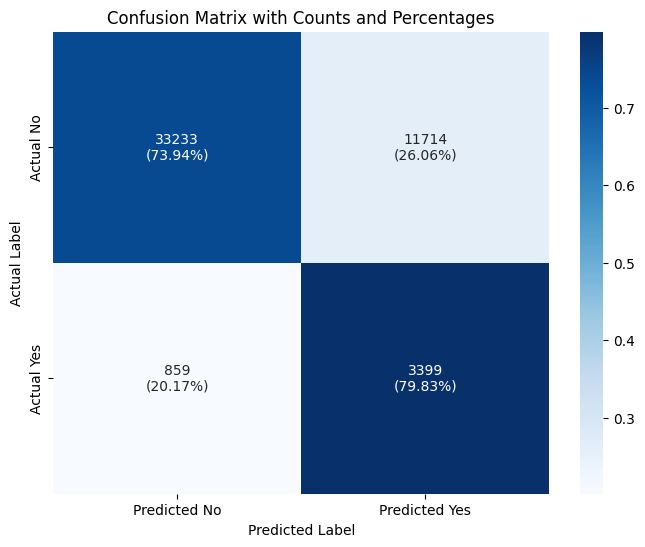

In [89]:
cm = confusion_matrix(y_test, ypred_log_reg)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

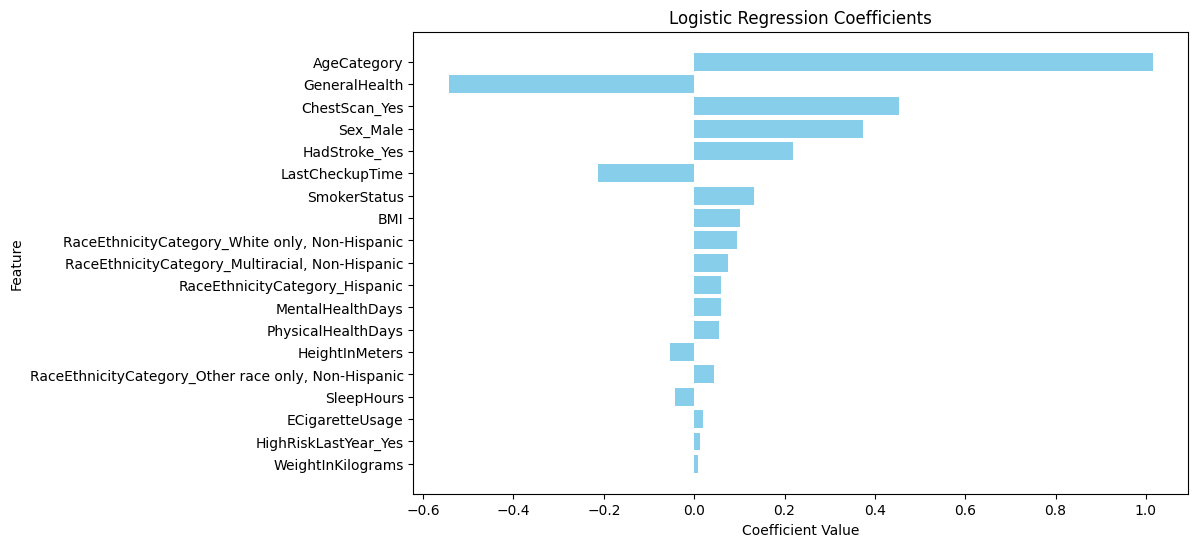

In [90]:
feature_names = cols
coefficients =best_log_reg.coef_.flatten()

# Create a DataFrame for easy manipulation
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of the coefficients to find the most impactful ones
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

balanced (smote)

In [91]:
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.01, 0.1, 1], 'max_iter': [100, 500],
                         'penalty': ['l2'], 'solver': ['liblinear']})

In [92]:
print(grid_search.best_params_)
best_log_reg = grid_search.best_estimator_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [93]:
ypred_log_reg = best_log_reg.predict(X_test_smote)

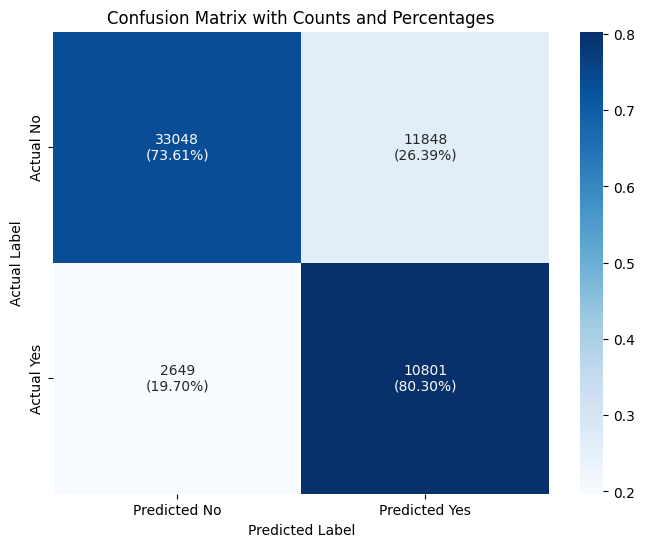

In [94]:
cm = confusion_matrix(y_test_smote, ypred_log_reg)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [95]:
ypred_log_reg = best_log_reg.predict(X_test)

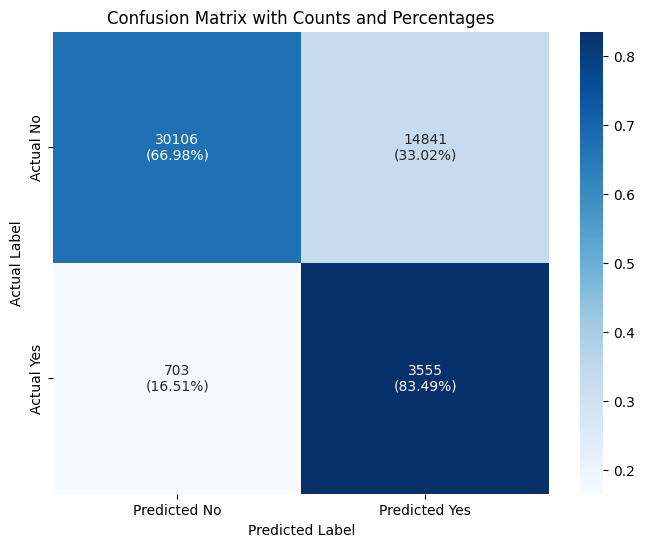

In [96]:
cm = confusion_matrix(y_test, ypred_log_reg)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# PCA

In [102]:
from sklearn.decomposition import PCA

In [103]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

In [105]:
# plt.figure(figsize=(10, 8))
# plt.scatter(X_pca[X['HadAngina_Yes'] == 0, 0], X_pca[X['HadAngina_Yes'] == 0, 1], 
#             label="Normal", alpha=0.5, s=10, color='blue')
# plt.scatter(X_pca[X['HadAngina_Yes'] == 1, 0], X_pca[X['HadAngina_Yes'] == 1, 1], 
#             label="Anomalies", alpha=0.5, s=10, color='red')

# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.title("2D PCA of Training Data")
# plt.legend()
# plt.show()

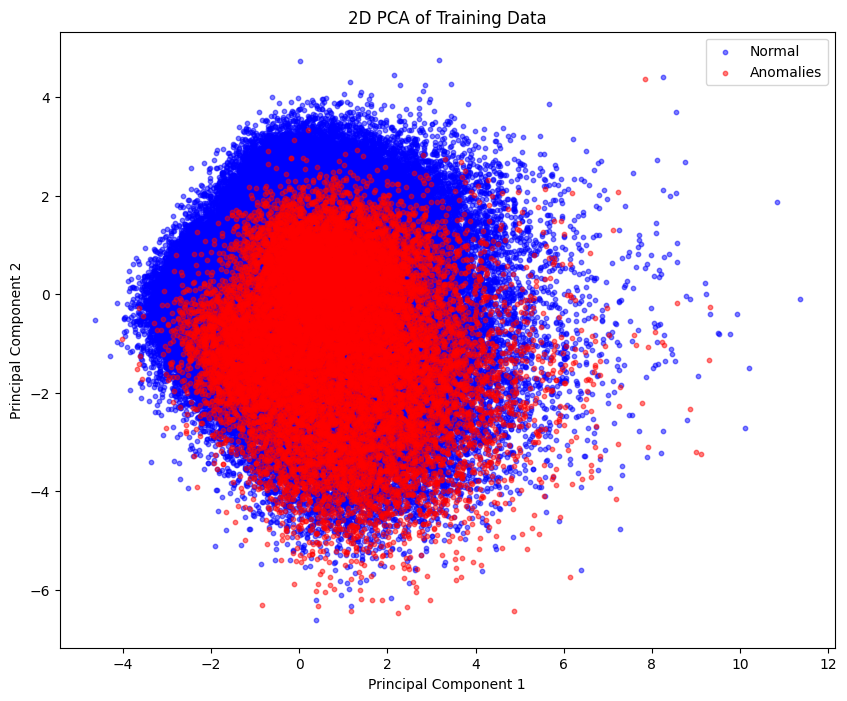

In [106]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[y_train == 0, 0], X_pca[y_train == 0, 1], 
            label="Normal", alpha=0.5, s=10, color='blue')
plt.scatter(X_pca[y_train == 1, 0], X_pca[y_train == 1, 1], 
            label="Anomalies", alpha=0.5, s=10, color='red')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA of Training Data")
plt.legend()
plt.show()

In [107]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

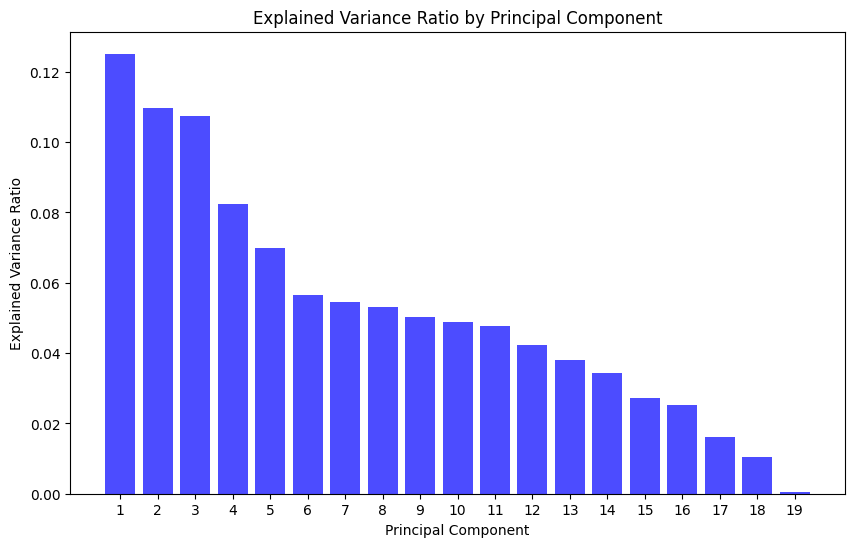

In [108]:
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance for each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.show()

In [124]:
df_combined.columns

Index(['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'SleepHours', 'RemovedTeeth', 'HadDiabetes',
       'SmokerStatus', 'ECigaretteUsage', 'AgeCategory', 'HeightInMeters',
       'WeightInKilograms', 'BMI', 'TetanusLast10Tdap', 'CovidPos', 'Sex_Male',
       'PhysicalActivities_Yes', 'HadStroke_Yes', 'HadAsthma_Yes',
       'HadSkinCancer_Yes', 'HadCOPD_Yes', 'HadDepressiveDisorder_Yes',
       'HadKidneyDisease_Yes', 'HadArthritis_Yes', 'DeafOrHardOfHearing_Yes',
       'BlindOrVisionDifficulty_Yes', 'DifficultyConcentrating_Yes',
       'DifficultyWalking_Yes', 'DifficultyDressingBathing_Yes',
       'DifficultyErrands_Yes', 'ChestScan_Yes',
       'RaceEthnicityCategory_Hispanic',
       'RaceEthnicityCategory_Multiracial, Non-Hispanic',
       'RaceEthnicityCategory_Other race only, Non-Hispanic',
       'RaceEthnicityCategory_White only, Non-Hispanic', 'AlcoholDrinkers_Yes',
       'HIVTesting_Yes', 'FluVaxLast12_Yes', 'PneumoVaxEver_Yes',
 

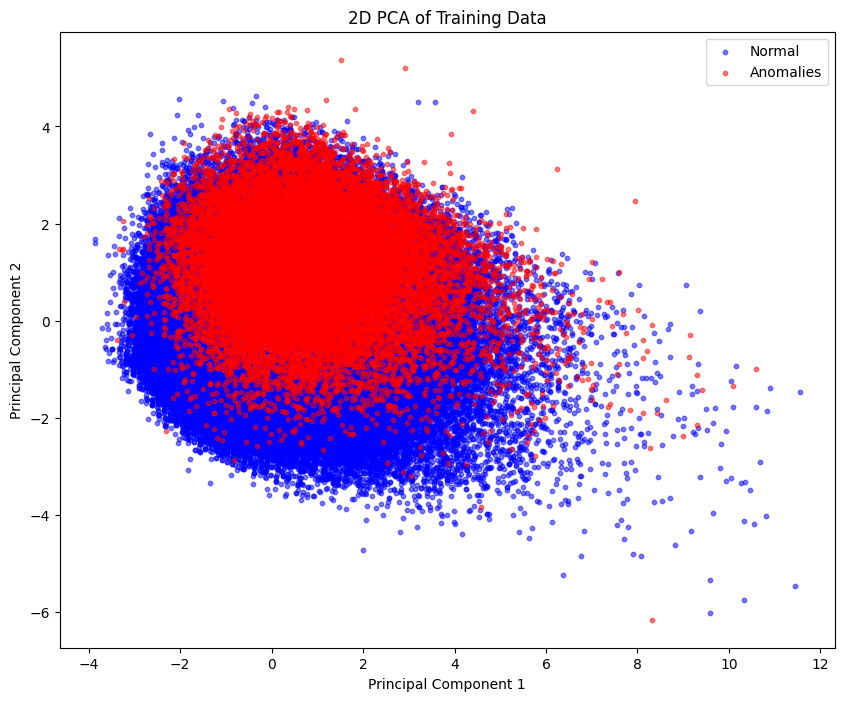

In [132]:
test_cols = [
    'HeightInMeters',
    'WeightInKilograms',
    'GeneralHealth',
    'HadDiabetes',
    'ChestScan_Yes',
    'AgeCategory',
    'BMI',
]
pca = PCA()
scaler = StandardScaler()
X_pca = pca.fit_transform(scaler.fit_transform(df_combined[test_cols]))

plt.figure(figsize=(10, 8))
# plt.scatter(X_pca[df_combined['HadHeartDisease_Yes'] == 1, 0], X_pca[df_combined['HadHeartDisease_Yes'] == 1, 1], 
#             label="Anomalies", alpha=0.5, s=10, color='red')
plt.scatter(X_pca[df_combined['HadHeartDisease_Yes'] == 0, 0], X_pca[df_combined['HadHeartDisease_Yes'] == 0, 1], 
            label="Normal", alpha=0.5, s=10, color='blue')
plt.scatter(X_pca[df_combined['HadHeartDisease_Yes'] == 1, 0], X_pca[df_combined['HadHeartDisease_Yes'] == 1, 1], 
            label="Anomalies", alpha=0.5, s=10, color='red')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA of Training Data")
plt.legend()
plt.show()

# Visualizations

### AgeCategory and GeneralHealth

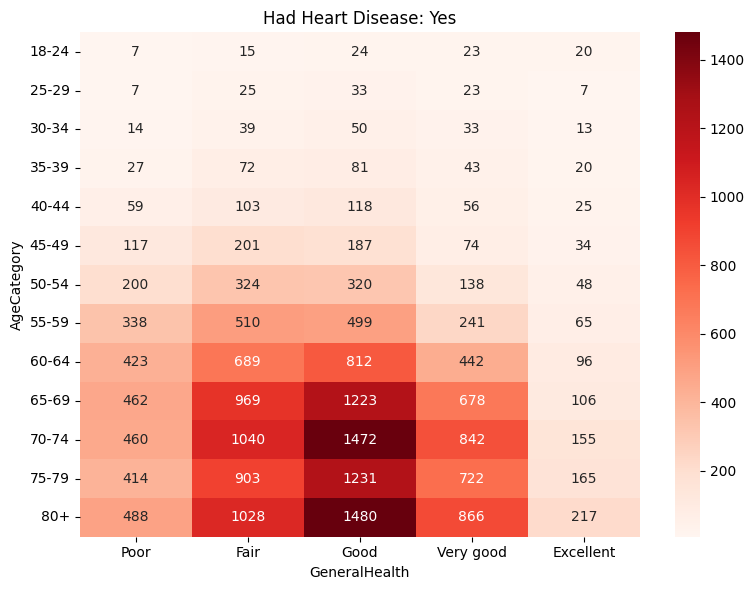

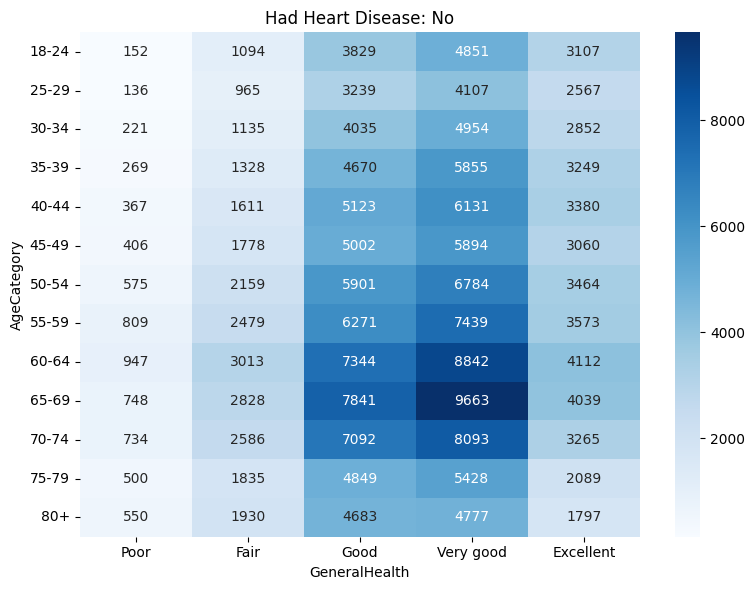

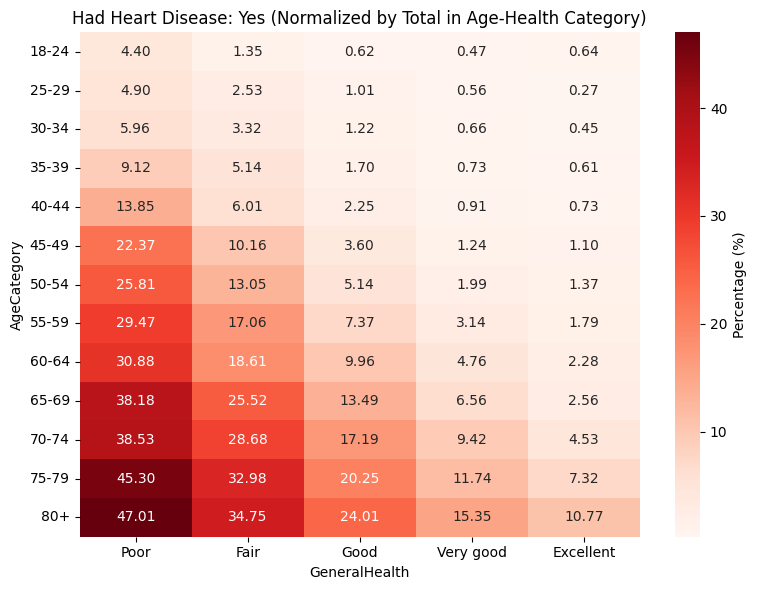

In [27]:
general_health_labels = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
age_category_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', 
                       '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

heart_disease_yes = X[y == 1]
heart_disease_no = X[y == 0]

# cross-tab calculations
cross_tab_yes = pd.crosstab(heart_disease_yes['AgeCategory'], heart_disease_yes['GeneralHealth'])
cross_tab_no = pd.crosstab(heart_disease_no['AgeCategory'], heart_disease_no['GeneralHealth'])
cross_tab_total = cross_tab_yes.add(cross_tab_no, fill_value=0)

cross_tab_yes_normalized = cross_tab_yes / cross_tab_total * 100 
cross_tab_no_normalized = cross_tab_no / cross_tab_total * 100 

# Yes counts heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_yes, annot=True, cmap="Reds", fmt="d", 
            xticklabels=general_health_labels, yticklabels=age_category_labels)
plt.title("Had Heart Disease: Yes")
plt.xlabel("GeneralHealth")
plt.ylabel("AgeCategory")
plt.tight_layout()
plt.show()

# No counts heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_no, annot=True, cmap="Blues", fmt="d", 
            xticklabels=general_health_labels, yticklabels=age_category_labels)
plt.title("Had Heart Disease: No")
plt.xlabel("GeneralHealth")
plt.ylabel("AgeCategory")
plt.tight_layout()
plt.show()

# Yes normalized counts heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_yes_normalized, annot=True, cmap="Reds", fmt=".2f", 
            xticklabels=general_health_labels, yticklabels=age_category_labels, cbar_kws={'label': 'Percentage (%)'})
plt.title("Had Heart Disease: Yes (Normalized by Total in Age-Health Category)")
plt.xlabel("GeneralHealth")
plt.ylabel("AgeCategory")
plt.tight_layout()
plt.show()

### test

In [189]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, weights='distance')
model.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [190]:
ypred = model.predict(X_test)

In [191]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, ypred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, ypred)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.8751

Confusion Matrix:
[[39458  5489]
 [  658  3600]]
